# 기술 통계 - 시각화 탐색

## 1. 필요 라이브러리 Import 

In [11]:
import pandas as pd # pandas package
# import numpy as np  # numpy package : np.nan 이용 결측값 생성 
# import scipy.stats as stats 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지 

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 2. 데이터 셋 생성 
#### 팁 데이터 셋 (tips)
#### 레스토랑에 방문한 손님이 팁을 얼마나 주는지, 성별, 흡연여부, 요일, 식사 시간, 식사 인원 등에 대한 정보를 가지고 있는 데이터 셋
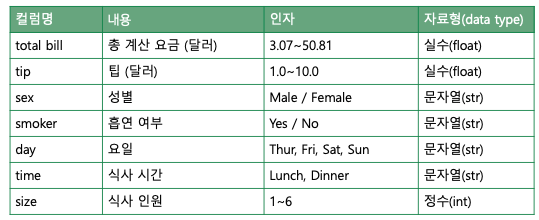


In [12]:
#tips data 로드 
data = sns.load_dataset('tips')

## 3. 시각화 탐색 

### 1) 상자그림(Box Plot)
#### 사분위수를 계산하여, 최대/최소값을 벗어나는 이상값 시각화

In [13]:
# 백분위수 계산(percentile)
print(data['tip'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

print("\n")
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data['tip'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.4400
0.25    2.0000
0.50    2.9000
0.75    3.5625
0.95    5.1955
Name: tip, dtype: float64


     5.0%  25.0%  50.0%   75.0%   95.0%
tip  1.44    2.0    2.9  3.5625  5.1955


Text(0, 0.5, '달러($)')

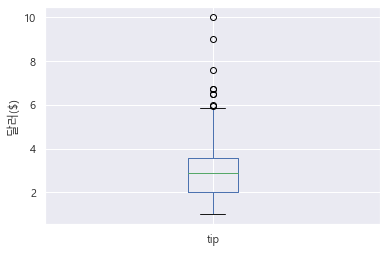

In [14]:
# 한 변수에 대한 이상값 시각화 
ax = (data['tip']).plot.box()
ax.set_ylabel('달러($)')

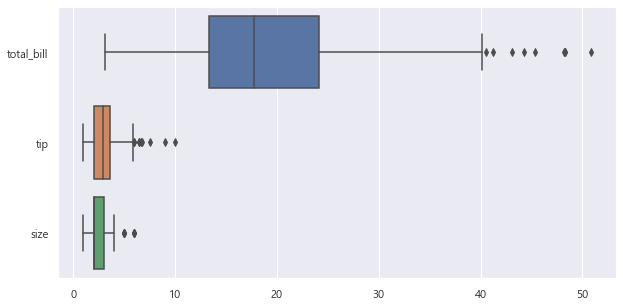

In [15]:
# 박스 플롯을 이용한 전체 변수의 이상값 확인  
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, orient='h')
plt.show()

### 2) 막대차트(Bar Chart)
#### 사물의 양을 막대 모양의 길이로 나타낸 그래프(비교 시각화) 

In [16]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
# 요일별 tip 비교 
tips_sum_day = data.groupby('day').tip.sum()
tips_sum_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

<BarContainer object of 4 artists>

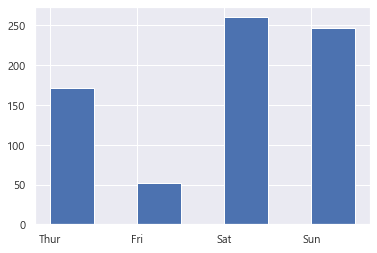

In [21]:
# matplotlib 막대 그래프 시각 
label = ['Thur', 'Fri', 'Sat', 'Sun']
plt.bar(label, tips_sum_day, width=0.5, align='edge')

<AxesSubplot:xlabel='sex', ylabel='tip'>

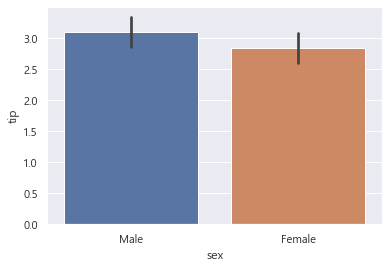

In [19]:
# Seaborn 막대 그래프 시각화 
# 성별, 평균 팁 비교 
sns.barplot(data= data, x= "sex", y= "tip")

<AxesSubplot:xlabel='sex', ylabel='tip'>

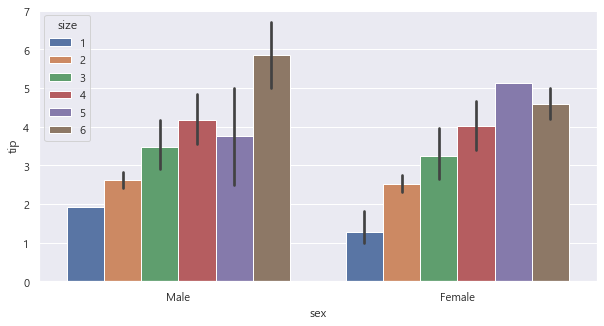

In [20]:
# 식사 인월(size)별 남성과 여성 tip 평균 비교
## 여러 열에서 집단 묶어서 세부 집단 시각화 (hue)
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="sex", y="tip", hue="size") 

### 2) 도수 분포표 & 히스토그램 
#### pd.cut() : 연속된 수치(continuous values)를 구간으로 나누어 카테고리화 할 때 사용

In [138]:
# 도수 분포표 
## 총 계산 금액 구간 별 빈도수 
bin_total = pd.cut(data['total_bill'], 8) # data를 8개 구간 별로 잘라서 개수 세줌
bin_total.value_counts()

(15.005, 20.972]    81
(9.038, 15.005]     68
(20.972, 26.94]     38
(26.94, 32.908]     24
(3.022, 9.038]      12
(32.908, 38.875]    10
(38.875, 44.842]     6
(44.842, 50.81]      5
Name: total_bill, dtype: int64

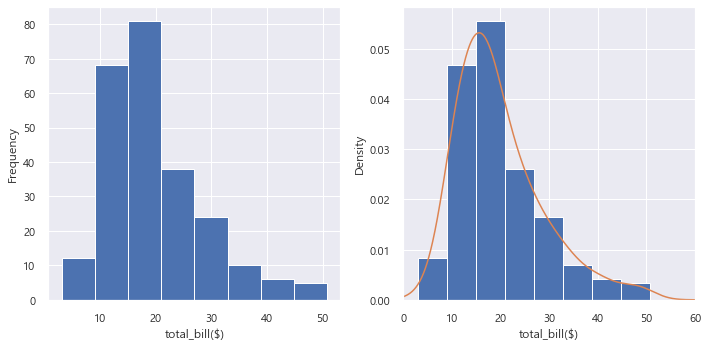

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
#히스토그램
# plt.style.use("ggplot")
ax1 = plt.subplot(1,2,1)
ax1 = (data['total_bill'] ).plot.hist(bins=8) # bins 구간 수 
ax1.set_xlabel('total_bill($)');

#밀도그림
# plt.style.use("seaborn")
plt.subplot(1,2,2)
ax2 = data['total_bill'].plot.hist(density=True,xlim=[0,60], bins=8)
data['total_bill'].plot.density(ax=ax2);
ax2.set_xlabel('total_bill($)');


plt.tight_layout()
plt.show()